In [142]:
# Random Forest Base Model

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the training and testing datasets
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

# Separate features and labels
X_train = train_set.drop('credit_status', axis=1)
y_train = train_set['credit_status']
X_test = test_set.drop(['credit_status', 'id'], axis=1)
y_test = test_set['credit_status']

# Building the Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8767142073505211
Confusion Matrix:
 [[ 228  413]
 [ 486 6165]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.32      0.36      0.34       641
        Good       0.94      0.93      0.93      6651

    accuracy                           0.88      7292
   macro avg       0.63      0.64      0.63      7292
weighted avg       0.88      0.88      0.88      7292



In [152]:
# XGBoost Base Model

import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load datasets
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

# Define feature columns (all except 'id' and 'credit_status')
feature_columns = [col for col in train_df.columns if col not in ["credit_status", "id"]]

# Split features and target
X_train = train_df[feature_columns]
y_train = LabelEncoder().fit_transform(train_df["credit_status"])
X_test = test_df[feature_columns]
y_test = LabelEncoder().fit_transform(test_df["credit_status"])

# Initialize and train XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Attach predictions to customer IDs
results_df = test_df[["id"]].copy()
results_df["predicted_credit_status"] = y_pred

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8764399341744378

Confusion Matrix:
 [[ 125  516]
 [ 385 6266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22       641
           1       0.92      0.94      0.93      6651

    accuracy                           0.88      7292
   macro avg       0.58      0.57      0.58      7292
weighted avg       0.86      0.88      0.87      7292



In [150]:
# Stacking Base Model

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load datasets
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

# Define features and target
feature_columns = [col for col in train_df.columns if col not in ["credit_status", "id"]]
X_train = train_df[feature_columns]
X_test = test_df[feature_columns]

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(train_df["credit_status"])
y_test = le.transform(test_df["credit_status"])

# Define base models
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(eval_metric='logloss')

# Create Stacking Ensemble
stacking_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression(max_iter=2000),
    passthrough=True,
    n_jobs=-1
)

# Train and predict
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.8827482172243555

Confusion Matrix:
 [[ 201  440]
 [ 415 6236]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.33      0.31      0.32       641
        Good       0.93      0.94      0.94      6651

    accuracy                           0.88      7292
   macro avg       0.63      0.63      0.63      7292
weighted avg       0.88      0.88      0.88      7292



Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

🔎 Evaluating thresholds...

Threshold: 0.00
Precision (Bad): 0.1183
Recall (Bad):    0.7457
F1 Score (Bad):  0.2043

Threshold: 0.05
Precision (Bad): 0.1529
Recall (Bad):    0.6240
F1 Score (Bad):  0.2456

Threshold: 0.10
Precision (Bad): 0.1690
Recall (Bad):    0.5757
F1 Score (Bad):  0.2613

Threshold: 0.15
Precision (Bad): 0.1810
Recall (Bad):    0.5257
F1 Score (Bad):  0.2693

Threshold: 0.20
Precision (Bad): 0.1905
Recall (Bad):    0.4587
F1 Score (Bad):  0.2692

Threshold: 0.25
Precision (Bad): 0.2057
Recall (Bad):    0.4197
F1 Score (Bad):  0.2760

Threshold: 0.30
Precision (Bad): 0.2201
Recall (Bad):    0.3697
F1 Score (Bad):  0.2759

Threshold: 0.35
Precision (Bad): 0.2223
Recall (Bad):    0.3198
F1 Score (Bad):  0.2623

Threshold: 0.40
Precision (Bad): 0.231

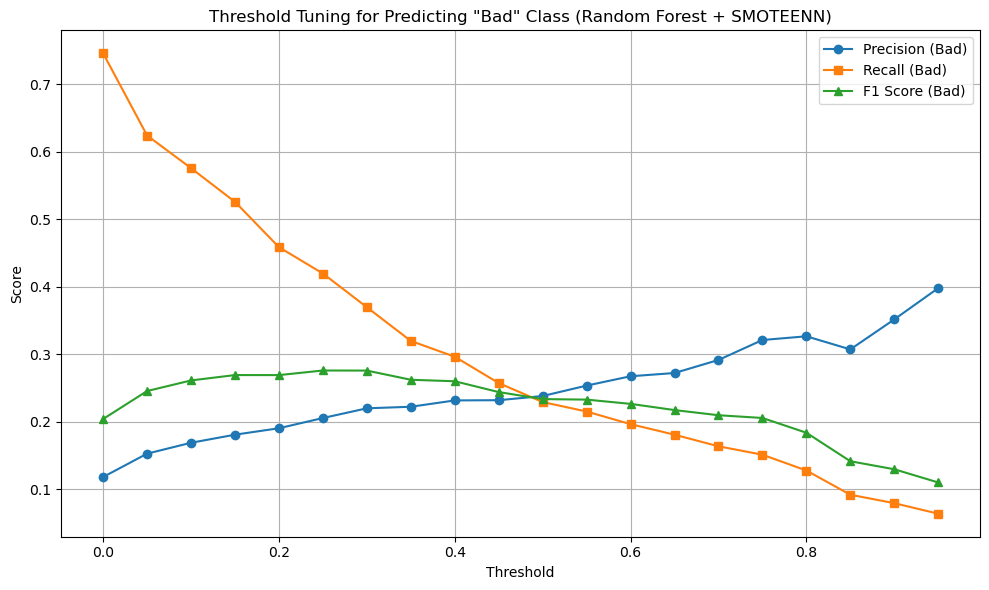


📌 Best threshold based on F1 Score: 0.25
Final Evaluation:

Accuracy: 0.806500274273176
Confusion Matrix:
 [[ 269  372]
 [1039 5612]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.21      0.42      0.28       641
        Good       0.94      0.84      0.89      6651

    accuracy                           0.81      7292
   macro avg       0.57      0.63      0.58      7292
weighted avg       0.87      0.81      0.83      7292



In [192]:
# Random Forest Tuning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, make_scorer
)
from imblearn.combine import SMOTEENN

# Load the training and testing datasets
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

# Separate features and labels
X_train = train_set.drop(['credit_status'], axis=1)
y_train = train_set['credit_status']
X_test = test_set.drop(['credit_status', 'id'], axis=1)
y_test = test_set['credit_status']

# Apply SMOTEENN to handle class imbalance
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# Use F1 Score for "Bad" class as the scoring metric
scorer = make_scorer(f1_score, pos_label='Bad')

# Grid search with Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Train model
grid_search.fit(X_resampled, y_resampled)
best_rf = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

# Get predicted probabilities for test set
y_probs = best_rf.predict_proba(X_test)

# Index of the 'Bad' class
bad_index = list(best_rf.classes_).index('Bad')

# Evaluate different thresholds
thresholds = np.arange(0, 1, 0.05)
precisions = []
recalls = []
f1s = []

print("\n🔎 Evaluating thresholds...\n")
for threshold in thresholds:
    y_pred = np.where(y_probs[:, bad_index] > threshold, 'Bad', 'Good')
    
    precision = precision_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision (Bad): {precision:.4f}")
    print(f"Recall (Bad):    {recall:.4f}")
    print(f"F1 Score (Bad):  {f1:.4f}\n")

# Plot precision-recall-f1 tradeoff
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision (Bad)', marker='o')
plt.plot(thresholds, recalls, label='Recall (Bad)', marker='s')
plt.plot(thresholds, f1s, label='F1 Score (Bad)', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for Predicting "Bad" Class (Random Forest + SMOTEENN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Pick threshold with best F1 Score
best_thresh = thresholds[np.argmax(f1s)]
y_final = np.where(y_probs[:, bad_index] > best_thresh, 'Bad', 'Good')

print(f"\n📌 Best threshold based on F1 Score: {best_thresh:.2f}")
print("Final Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final))
print("Classification Report:\n", classification_report(y_test, y_final))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}

🔎 Evaluating thresholds...

Threshold: 0.00
Precision (Bad): 0.0879
Recall (Bad):    1.0000
F1 Score (Bad):  0.1616

Threshold: 0.05
Precision (Bad): 0.1026
Recall (Bad):    0.7098
F1 Score (Bad):  0.1793

Threshold: 0.10
Precision (Bad): 0.1184
Recall (Bad):    0.5039
F1 Score (Bad):  0.1917

Threshold: 0.15
Precision (Bad): 0.1298
Recall (Bad):    0.3729
F1 Score (Bad):  0.1925

Threshold: 0.20
Precision (Bad): 0.1490
Recall (Bad):    0.2964
F1 Score (Bad):  0.1983

Threshold: 0.25
Precision (Bad): 0.1584
Recall (Bad):    0.2434
F1 Score (Bad):  0.1919

Threshold: 0.30
Precision (Bad): 0.1737
Recall (Bad):    0.1981
F1 Score (Bad):  0.1851

Threshold: 0.35
Precision (Bad): 0.2030
Recall (Bad):    0.1700
F1 Score (Bad):  0.1851

Threshold: 0.40
Precision (Bad): 0.2132
Recall (Bad):

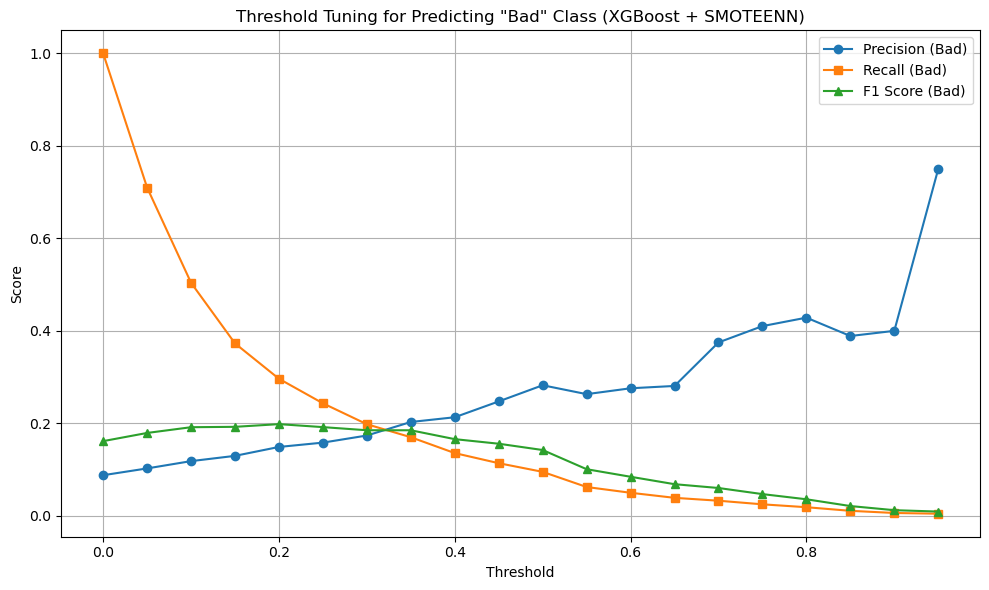


📌 Best threshold based on F1 Score: 0.20

Final Evaluation:

Accuracy: 0.7893582007679649
Confusion Matrix:
 [[ 190  451]
 [1085 5566]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.15      0.30      0.20       641
        Good       0.93      0.84      0.88      6651

    accuracy                           0.79      7292
   macro avg       0.54      0.57      0.54      7292
weighted avg       0.86      0.79      0.82      7292



In [193]:
# XGBoost Tuning

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, accuracy_score, make_scorer)
import matplotlib.pyplot as plt

# Load datasets
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

# Define feature columns
feature_columns = [col for col in train_df.columns if col not in ["credit_status", "id"]]

# Prepare training and testing data
X_train = train_df[feature_columns]
X_test = test_df[feature_columns]
y_train = train_df["credit_status"]
y_test = test_df["credit_status"]

# Encode labels to 0 = Bad, 1 = Good
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
bad_index = list(le.classes_).index('Bad')  # Usually 0

# Apply SMOTEENN to training data
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train_encoded)

# Define model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1]  
}

# Scorer for F1 score on "Bad" class
scorer = make_scorer(f1_score, pos_label=bad_index)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit model on resampled data
grid_search.fit(X_resampled, y_resampled)
best_xgb = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

# Get predicted probabilities
y_probs = best_xgb.predict_proba(X_test)

# Threshold tuning
thresholds = np.arange(0, 1, 0.05)
precisions, recalls, f1s = [], [], []

print("\n🔎 Evaluating thresholds...\n")
for threshold in thresholds:
    y_pred = np.where(y_probs[:, bad_index] > threshold, 'Bad', 'Good')

    precision = precision_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label='Bad', zero_division=0)

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

    print(f"Threshold: {threshold:.2f}")
    print(f"Precision (Bad): {precision:.4f}")
    print(f"Recall (Bad):    {recall:.4f}")
    print(f"F1 Score (Bad):  {f1:.4f}\n")

# Plot
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision (Bad)', marker='o')
plt.plot(thresholds, recalls, label='Recall (Bad)', marker='s')
plt.plot(thresholds, f1s, label='F1 Score (Bad)', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for Predicting "Bad" Class (XGBoost + SMOTEENN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Evaluation with best F1 threshold
best_thresh = thresholds[np.argmax(f1s)]
y_final = np.where(y_probs[:, bad_index] > best_thresh, 'Bad', 'Good')

print(f"\n📌 Best threshold based on F1 Score: {best_thresh:.2f}")
print("\nFinal Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final))
print("Classification Report:\n", classification_report(y_test, y_final))

Fitting 3 folds for each of 8 candidates, totalling 24 fits

🔎 Evaluating thresholds based on F1 Score (Bad)...

Threshold: 0.00
Precision (Bad): 0.0879
Recall (Bad):    1.0000
F1 Score (Bad):  0.1616

Threshold: 0.05
Precision (Bad): 0.1144
Recall (Bad):    0.5086
F1 Score (Bad):  0.1868

Threshold: 0.10
Precision (Bad): 0.1227
Recall (Bad):    0.3604
F1 Score (Bad):  0.1830

Threshold: 0.15
Precision (Bad): 0.1294
Recall (Bad):    0.3011
F1 Score (Bad):  0.1811

Threshold: 0.20
Precision (Bad): 0.1393
Recall (Bad):    0.2668
F1 Score (Bad):  0.1830

Threshold: 0.25
Precision (Bad): 0.1493
Recall (Bad):    0.2418
F1 Score (Bad):  0.1846

Threshold: 0.30
Precision (Bad): 0.1529
Recall (Bad):    0.2075
F1 Score (Bad):  0.1760

Threshold: 0.35
Precision (Bad): 0.1479
Recall (Bad):    0.1700
F1 Score (Bad):  0.1582

Threshold: 0.40
Precision (Bad): 0.1514
Recall (Bad):    0.1498
F1 Score (Bad):  0.1506

Threshold: 0.45
Precision (Bad): 0.1525
Recall (Bad):    0.1232
F1 Score (Bad):  0.136

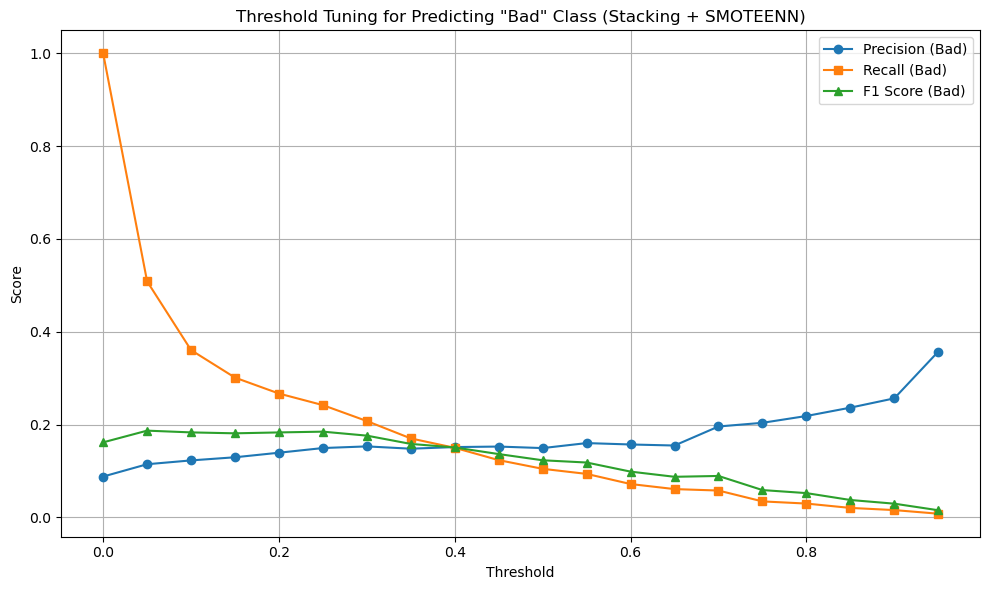


📌 Best threshold based on F1 Score (Bad): 0.05

Final Evaluation:

Accuracy: 0.6108063631376851
Confusion Matrix:
 [[ 326  315]
 [2523 4128]]
Classification Report:
               precision    recall  f1-score   support

         Bad       0.11      0.51      0.19       641
        Good       0.93      0.62      0.74      6651

    accuracy                           0.61      7292
   macro avg       0.52      0.56      0.47      7292
weighted avg       0.86      0.61      0.70      7292



In [196]:
# Stacking Model Tuning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline

# Load data
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

# Define features and labels
feature_columns = [col for col in train_df.columns if col not in ["credit_status", "id"]]
X_train = train_df[feature_columns]
y_train = train_df["credit_status"]
X_test = test_df[feature_columns]
y_test = test_df["credit_status"]

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
bad_index = list(le.classes_).index('Bad')

# Define base learners
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss')

# Define final estimator
final_estimator = LogisticRegression(
    max_iter=10000,
    solver='lbfgs',
    random_state=42
)

# Create stacking classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=final_estimator,
    passthrough=True,
    n_jobs=-1
)

# Combine SMOTEENN with stacking in a pipeline
pipeline = ImbPipeline(steps=[
    ('resample', SMOTEENN(random_state=42)),
    ('model', stacking)
])

# Define grid search parameters for base estimators
param_grid = {
    'model__rf__n_estimators': [100, 200],
    'model__rf__max_depth': [5, 10],
    'model__xgb__n_estimators': [100],
    'model__xgb__learning_rate': [0.05, 0.1]
}

# Grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='precision',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train_enc)
best_model = grid_search.best_estimator_

# Predict probabilities using best stacking model
y_probs = best_model.predict_proba(X_test)

# Threshold tuning
thresholds = np.arange(0, 1, 0.05)
precisions, recalls, f1s = [], [], []

print("\n🔎 Evaluating thresholds based on F1 Score (Bad)...\n")
for threshold in thresholds:
    y_pred = np.where(y_probs[:, bad_index] > threshold, 'Bad', 'Good')
    
    precision = precision_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label='Bad', zero_division=0)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"Threshold: {threshold:.2f}")
    print(f"Precision (Bad): {precision:.4f}")
    print(f"Recall (Bad):    {recall:.4f}")
    print(f"F1 Score (Bad):  {f1:.4f}\n")

# Plot precision-recall-f1
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision (Bad)', marker='o')
plt.plot(thresholds, recalls, label='Recall (Bad)', marker='s')
plt.plot(thresholds, f1s, label='F1 Score (Bad)', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for Predicting "Bad" Class (Stacking + SMOTEENN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose best threshold by F1 score
best_thresh = thresholds[np.argmax(f1s)]
y_final = np.where(y_probs[:, bad_index] > best_thresh, 'Bad', 'Good')

print(f"\n📌 Best threshold based on F1 Score (Bad): {best_thresh:.2f}")
print("\nFinal Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_final))
print("Classification Report:\n", classification_report(y_test, y_final))